<a href="https://colab.research.google.com/github/Derwuel/Entrega_monopolio/blob/main/TP1/practicaMono01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de base de datos monopolio:

En la siguiente ejercicio se tratara de analizar algunos datos de una bases de datos especializada en monopolio, en concreto se tratará de analizar algunas características de los usuarios como: 'Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',  'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', con el fin de poder determinar cual es el tipo de persona que mas consume los productos del juego monopolio.

# ***Primera fase:***

para el desarrollo de este ejersocio se tomo una base de datos del juego de monopolio, en esta base de datos se encuentran datos de los crientes que en algun momento han consumido cualquer tipo de producto de la marca monopolio, esta nformcion sera analizada para ode crear un pefil de usuario, esto con el fin de focar la publicidad a ese tipo de persona

1.- Primera parte: esta parte del código nos permite obtener las librerías adecuadas para poder realizar el análisis de los datos, entre la distintas librerias que podemos encontrar usaremos las siguienetes: %matplotlib para poder mostrar graficos, wquantiles para ponderar y calular cuartiles, openpyxl para usar los archivos en formato exel y opendatasets para conectarnos con kaggel.

Otras librerias importantes son:
* pandas: análisa los datos y estructuras del DataFrames.
* numpy: raliza cálculos numéricos, incluyendo operaciones con matrices.
* seaborn: Visualización de datos.
* matplotlib.pyplot: Biblioteca de visualización para crear gráficos
estáticos.
* opendatasets: Para descargar datasets desde fuentes como Kaggle.
* wquantiles: Para calcular cuantiles ponderados.
* os: Para interactuar con el sistema operativo.

Estos son algunos modulos adicionales que nos permitiran realisar algunas acciones especificas:
* pathlib.Path: Para manejar rutas de archivos.
* scipy.stats.trim_mean: Para calcular la media truncada.
* statsmodels.robust: Proporciona herramientas de estadística.
* sklearn.model_selection.train_test_split: Para dividir el dataset en conjuntos de entrenamiento y prueba.
* sklearn.model_selection.cross_val_score: Para realizar validación cruzada en modelos.
* sklearn.linear_model.LinearRegression: Para ajustar modelos de regresión lineal.
* sklearn.metrics.mean_squared_error: Para calcular el error cuadrático medio en la predicción.
* sklearn.metrics.r2_score: Para medir la precisión del modelo con el coeficiente de determinación.
* sklearn.tree.DecisionTreeClassifier: Para crear modelos de clasificación con árboles de decisión.
* sklearn.metrics.accuracy_score: Para medir la precisión de un modelo de clasificación.
* mpl_toolkits.mplot3d.Axes3D: crea gráficos en 3D con matplotlib.
* matplotlib.cm: Para trabajar con mapas de color en los gráficos.
* sklearn.impute.KNNImputer: permite imputar valores faltantes en los datos usando K-Nearest Neighbors.
* sklearn.preprocessing.StandardScaler: escala características a una distribución normal estándar.
* sklearn.preprocessing.LabelEncoder: converte etiquetas categóricas en valores numéricos.

In [ ]:
%matplotlib inline
!pip install wquantiles
!pip install openpyxl
!pip install opendatasets

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import opendatasets as od
import wquantiles
import os

from pathlib import Path
from scipy.stats import trim_mean
from statsmodels import robust
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.impute import KNNImputer

R.1: las blibliotecas se an agregado exitosamente no pareseque exista problemas al momento de usarlas.

2.- Con esta parte del código se puede obtener la base de datos, a través de una API, esta base de datos está almacenada en la página kaggel y a través de un nombre de usuario y de una contraseña se puede acceder a los datos desde cualquier lugar.

Estos son los datos nesesarios para consumir la API y poder acceder a la base de datos.

1.   dataset_link:esta parte del codigo nos permite llamar a la api, en este caso de la paguina kaggel.
2.   od.download(dataset_link): con esta parte del codigo podemos almasenar los archivos descargados en una variable que podemos usar libremente.
3.   os.listdir(): esta parete nos permite listar los elementos descargados.
4.   name="Base_clientes_Monopoly-0_prueba.xlsx": con esta parte del codigo podemos almasenar un archivo dentro de una variable, en este caso la base de datos.
5.   df = pd.read_excel(name): este codigo nos permite leer la base de datos usando las funciones de panda.



In [ ]:
#este es el codigo nesesario para poder usar la base de datos desde  kaggel
dataset_link="https://www.kaggle.com/datasets/derwuel/trabajo-mono"
od.download(dataset_link)
#aqui estamos cargando la base de datos para que despues podamos usarla de mejor manera
os.chdir("trabajo-mono")
os.listdir()
name="Base_clientes_Monopoly-0_prueba.xlsx"
df = pd.read_excel(name)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: derwuel
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/derwuel/trabajo-mono


100%|██████████| 116M/116M [00:01<00:00, 89.0MB/s] 


R.2: la base de datos se a cargado de manera adecuada, el proseso de usar la API es mucho mas efeciente que cargar el archivo directamente del computador.

# ***segunda fase:***
En esta fase prosederemos a alnlisar los datos que nos entrega la base de datos, en esta ocacion tenemos una base de datos enorme, esto implica que no todos los dato que se encuentren en ella seran de importancia para el desarrollo de nuestra modelos de entrenamiento, por lo que prosederemos a descartar algunas de las columnas que no nos apoetan nada y solo dejaresmos, las columnas que nos sirvan para la creacionde del perfil de usuario al que aspiramos.

3.- en esta parte del código comienza la limpieza de los datos, esto se hace con el fin de poder trabajar de manera más cómoda con ellos, en este caso procederemos a cambiar los datos del index, por los nombres de las columnas con el fin de identificarlos mejor y luego eliminaremos la primera fila de las columnas, ya que el index a tomado el valor de la primera fila, esta ya no es necesaria , luego tomaremos los datos de  la columna ‘sexo’ y los remplasaremos para que sea mas facil de trabajar al momento de realizar el analicis.

desglose del codigo:

1. primeras_columnas = df.columns[:60]: este metodo selecciona las primera lineas de la pase de datos y la presenta.
2. valores_segunda_fila = df.iloc[0, :60]: en este caseo estamos guardando los datos de las filas cero a la fila 60.
3. print(f"Nombres de las columnas: {primeras_columnas}"): esta línea imprime los nombres de las primeras 60 columnas.
4. print(f"Valores de la segunda fila: {valores_segunda_fila}"): esta línea imprime, agregando la fila cero.
5. df.columns = df.iloc[0]: este codigo se usa para poder acceder a los nombres de las columnas, ya que pretendemos cambiarlos.
6. df = df.drop(df.index[0]): con este codigo eliminaremos los nombre de la fila cero ya que no los usaremos.
7. df['Sexo'] = df['Sexo'].replace({'H': 1, 'M': 2}): con esta parte del codigo remplasaremos las valores de la fila sexo con el fin de poder trabajarlos mejor.
8. columnas_a_verificar: tomaremos las siguientes columnas con el fin de analizarlas.
9. for col in columnas_a_verificar: esto sirve para poder iniciar un bloque "for" dento de las columnas seleccionasas, de esta forma se podran usar comandos en las distintas filas de la base de datos.
10. print(f"Columna: {col} - Tipo de dato: {df[col].dtype}"): este codigo se usa con el fin de poder ver la informasion seleccionada de la vase de datos y en concreto el tipo de informacion que esta posee.


In [ ]:
#estos son los códigos que utilizaremos para hacer el primer sondeo de los datos
primeras_columnas = df.columns[:60]
valores_segunda_fila = df.iloc[0, :60]
print(f"Nombres de las columnas: {primeras_columnas}")
print(f"Valores de la segunda fila: {valores_segunda_fila}")

# Cambiar los nombres de las columnas por los valores de la fila 0
df.columns = df.iloc[0]

# Eliminar la fila 0 ya que ahora es innecesaria (contiene los nuevos nombres de columnas)
df = df.drop(df.index[0])

#este parte del codigo existe para poder trasformar los datos de tipo str a datos numericos
df['Sexo'] = df['Sexo'].replace({'H': 1, 'M': 2})

Nombres de las columnas: Index([     1,  '1.1',  '1.2',  '1.3',  '1.4',  '1.5',  '1.6',  '1.7',  '1.8',
        '1.9', '1.10', '1.11', '1.12', '1.13', '1.14', '1.15', '1.16', '1.17',
       '1.18', '1.19', '1.20', '1.21', '1.22', '1.23', '1.24', '1.25', '1.26',
       '1.27', '1.28', '1.29', '1.30', '1.31', '1.32', '1.33', '1.34', '1.35',
       '1.36', '1.37', '1.38', '1.39', '1.40', '1.41', '1.42', '1.43', '1.44',
       '1.45', '1.46', '1.47', '1.48', '1.49', '1.50', '1.51', '1.52', '1.53',
       '1.54', '1.55', '1.56', '1.57', '1.58', '1.59'],
      dtype='object')
Valores de la segunda fila: 1                   Id
1.1        Subsegmento
1.2               Sexo
1.3             Region
1.4               Edad
1.5              Renta
1.6         Antiguedad
1.7         Internauta
1.8          Adicional
1.9           Dualidad
1.10      Monoproducto
1.11            Ctacte
1.12           Consumo
1.13       Hipotecario
1.14            Debito
1.15         CambioPin
1.16           Cuentas
1.17

In [ ]:
# Definir las columnas que deseas verificar
columnas_a_verificar = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
                        'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
                        'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC']

# Mostrar el tipo de datos de cada columna
for col in columnas_a_verificar:
    print(f"Columna: {col} - Tipo de dato: {df[col].dtype}")

Columna: Id - Tipo de dato: object
Columna: Subsegmento - Tipo de dato: object
Columna: Sexo - Tipo de dato: float64
Columna: Region - Tipo de dato: object
Columna: Edad - Tipo de dato: object
Columna: Renta - Tipo de dato: object
Columna: Antiguedad - Tipo de dato: object
Columna: Internauta - Tipo de dato: object
Columna: Adicional - Tipo de dato: object
Columna: Dualidad - Tipo de dato: object
Columna: Monoproducto - Tipo de dato: object
Columna: Ctacte - Tipo de dato: object
Columna: Consumo - Tipo de dato: object
Columna: Hipotecario - Tipo de dato: object
Columna: Debito - Tipo de dato: object
Columna: CambioPin - Tipo de dato: object
Columna: Cuentas - Tipo de dato: object
Columna: TC - Tipo de dato: object


R.3: se han analisado los archivos y se a remplasado algunas filas con el fin de poder trabajar con la informacion de manera mas comoda,el remplaso de la informacion se llevo de manera exitosa.

# ***Tecera fase:***
Una ves hemos cargado la base de datos y comprobemos que no existe ningun error podemos pasar a la limpiesa de los datos, los datos que se encuentran almasenados en el achivo no son del todo optimos para el entrenamiento por lo qu deveremos modficarlos con el fni de que sean facilmente manejables, cosas como rellena la informacion faltante o alterar el tipo de datos de una columna, estas son acciones nesesarias para que, al momento de entrenar los modelos de prediccion, estos no comentan error o estos es caigan.

4.- una vez lista con la limpieza inicial trataremos de rellenar los datos faltantes, estos datos pueden producirse cuando la base de datos se corrompe o simplemente nunca existieron, primero tomaremos todos los datos que queremos imputar, y los transformaremos a un formato que permita su procesado, luego usaremos el método KNN(vecinos cercanos) para poder rellenar los datos faltantes y finalmente, devolveremos los datos a un formato fácil de entender para todos los procesos.

desglose de los codigos:

1. columnas_para_imputar: en esta secciones seleccionamos estas columnas con el fin de poder trabajar con ellas.
2. df[columnas_para_imputar] = df[columnas_para_imputar].astype('float32'): esta arte no permita transformar el tipo de datos de las columnas seleccionadas en este caso a datos de tipo "float" uno que es facil de trabajar para la inputacion de los datos.
3. imputer = KNNImputer(n_neighbors=5): esta parte del codigo nos permite realisar la imputacion usando el metodo de "los vecinos mas cercanos" un metodo en el que nos permitira calcular valos numericos en base a los 5 valores mas sercanos a los valores faltanes o corruptos que pueda poseer nuestras tablas.
4. df_imputed = pd.DataFrame(imputer.fit_transform(df[columnas_para_imputar]), columns=columnas_para_imputar): en esta parte del codigo nos permite realisar la imputacion de los datos y poder remplasar los valores faltantes con estos nuevos datos.
5. df_imputed['Id'] = df_imputed['Id'].astype('int64'): esta parte del codigo no permite volver a cambiar los tipos de datos que se almasenan en cada una de las columnas, esto se ase para poder trabajar de manera mas optima con los datos.
6. print(df_imputed.head()): esta parte no permite visialisar los datos de la base de datos una ves esta alla sido imputada.


In [ ]:
# Listar las columnas que quieres imputar
columnas_para_imputar = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
                         'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
                         'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC']

# Convertir todas las columnas a float32 para la imputación
df[columnas_para_imputar] = df[columnas_para_imputar].astype('float32')

# Continuar con la imputación KNN
imputer = KNNImputer(n_neighbors=5)

# Realizar la imputación en las columnas seleccionadas
df_imputed = pd.DataFrame(imputer.fit_transform(df[columnas_para_imputar]), columns=columnas_para_imputar)

In [ ]:
# Convertir de nuevo a los tipos de datos originales después de la imputación
df_imputed['Id'] = df_imputed['Id'].astype('int64')
df_imputed['Subsegmento'] = df_imputed['Subsegmento'].astype('int64')
df_imputed['Sexo'] = df_imputed['Sexo'].astype('int64')
df_imputed['Region'] = df_imputed['Region'].astype('int64')
df_imputed['Edad'] = df_imputed['Edad'].astype('int64')
df_imputed['Renta'] = df_imputed['Renta'].astype('int64')
df_imputed['Antiguedad'] = df_imputed['Antiguedad'].astype('int64')
df_imputed['Internauta'] = df_imputed['Internauta'].astype('int64')
df_imputed['Adicional'] = df_imputed['Adicional'].astype('int64')
df_imputed['Dualidad'] = df_imputed['Dualidad'].astype('int64')
df_imputed['Monoproducto'] = df_imputed['Monoproducto'].astype('int64')
df_imputed['Ctacte'] = df_imputed['Ctacte'].astype('int64')
df_imputed['Consumo'] = df_imputed['Consumo'].astype('int64')
df_imputed['Hipotecario'] = df_imputed['Hipotecario'].astype('int64')
df_imputed['Debito'] = df_imputed['Debito'].astype('int64')
df_imputed['CambioPin'] = df_imputed['CambioPin'].astype('int64')
df_imputed['Cuentas'] = df_imputed['Cuentas'].astype('int64')
df_imputed['TC'] = df_imputed['TC'].astype('int64')

# Imprimir el DataFrame imputado para verificar el resultado
print(df_imputed.head())

   Id  Subsegmento  Sexo  Region  Edad    Renta  Antiguedad  Internauta  \
0   1          160     2      13    43  1244075         130           1   
1   2          160     1      13    46   143640          69           1   
2   3          170     1      13    45   929106          24           1   
3   4          151     1      13    46   172447         134           0   
4   5          170     1      13    46   805250         116           0   

   Adicional  Dualidad  Monoproducto  Ctacte  Consumo  Hipotecario  Debito  \
0          1         0             0       1        0            0       1   
1          0         0             0       1        0            1       0   
2          1         0             0       1        0            1       1   
3          1         0             1       0        0            0       0   
4          1         1             0       1        0            1       0   

   CambioPin  Cuentas  TC  
0          1        1   3  
1          1        1   

R.4: esta parte del codigo toma las columnas que seran objetibo de la imputacion, tras realisar el proseso de los "vecinos" se bolvio a revisar las columnas y se descubrio que no quedaban datos corruptos o inexistentes por lo que el proseso fue un exito.

5.-  esta parte del código son los datos expresados en formato de gráficos con el fin de poder analizar la informacion de manera mas clara y concisa.

desgloce del codigo:

1. plt.figure(figsize=(20, 15)): prosederemos a realisar un ghrafico con el fin de entender mejor la informacion, esta linea de codigo nos dara las dimenciones que tendra el grfico.
2. for i, column in enumerate(columns_to_plot, 1):este cofigo no permite inplementar un bucle "for", que no ayudara a analizar todas las filas de la base de datos.
3. plt.subplot(5, 4, i): esta parte del codigo nos permite crear un acuadricula de sub categorias dentro del grafico.
4. sb.boxplot(data=df_imputed[column]): con esta parte del codigo, podremos crear un diagrama de caja, que noos permitira ver los valores anormales dentro del grafico.

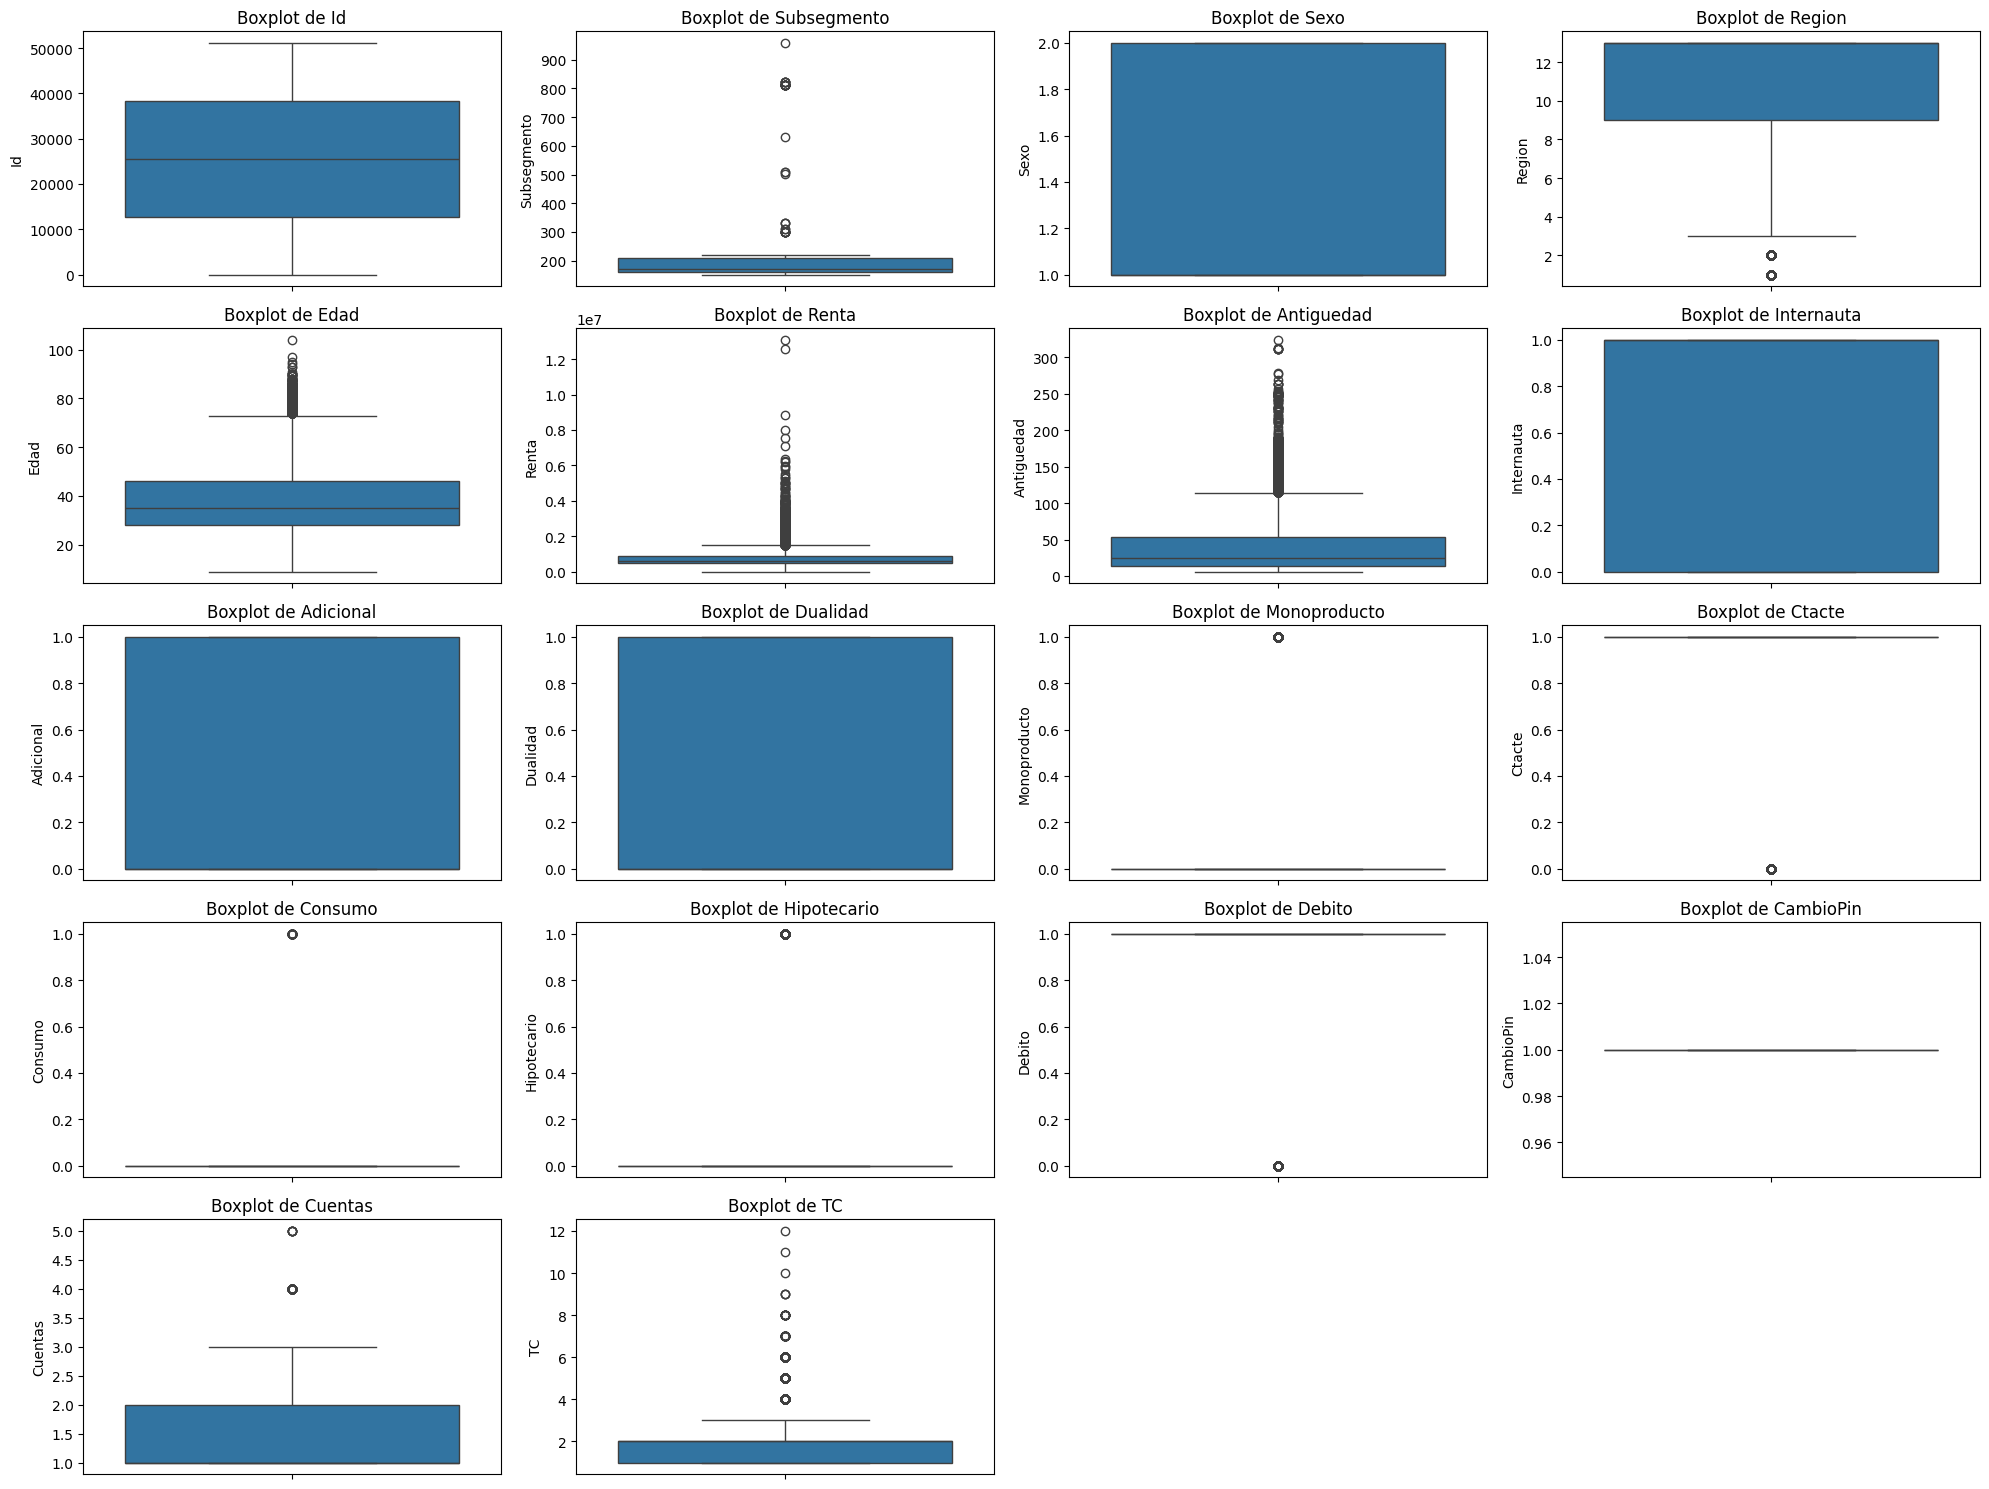

In [ ]:
#El siguiente código nos permite ver una gráfica de boxplot, esta gráfica es necesaria con el fin de poder encontrar datos con valores excesivos, estos datos deben ser reemplazados para poder se manejados de mejor manera.
# Definir las columnas que se desean graficar
columns_to_plot = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta',
                   'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito',
                   'CambioPin', 'Cuentas', 'TC']
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sb.boxplot(data=df_imputed[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

R.5.1: estos graficos muestran los datos extremos que se encontraron en las diferentes columnas, pero realmente su existencia no afecta al resulatado de los modelos futuros.

<ipython-input-14-1ad83335bcb3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Sexo', y='Consumo', data=df_imputed, ax=axes[0, 0], palette=palette)
<ipython-input-14-1ad83335bcb3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Sexo', y='Internauta', data=df_imputed, ax=axes[0, 1], palette=palette)
<ipython-input-14-1ad83335bcb3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Sexo', y='Debito', data=df_imputed, ax=axes[1, 0], palette=palette)
<ipython-input-14-1ad83335bcb3>:10: FutureWarning: 

Passing `palette` without assigning 

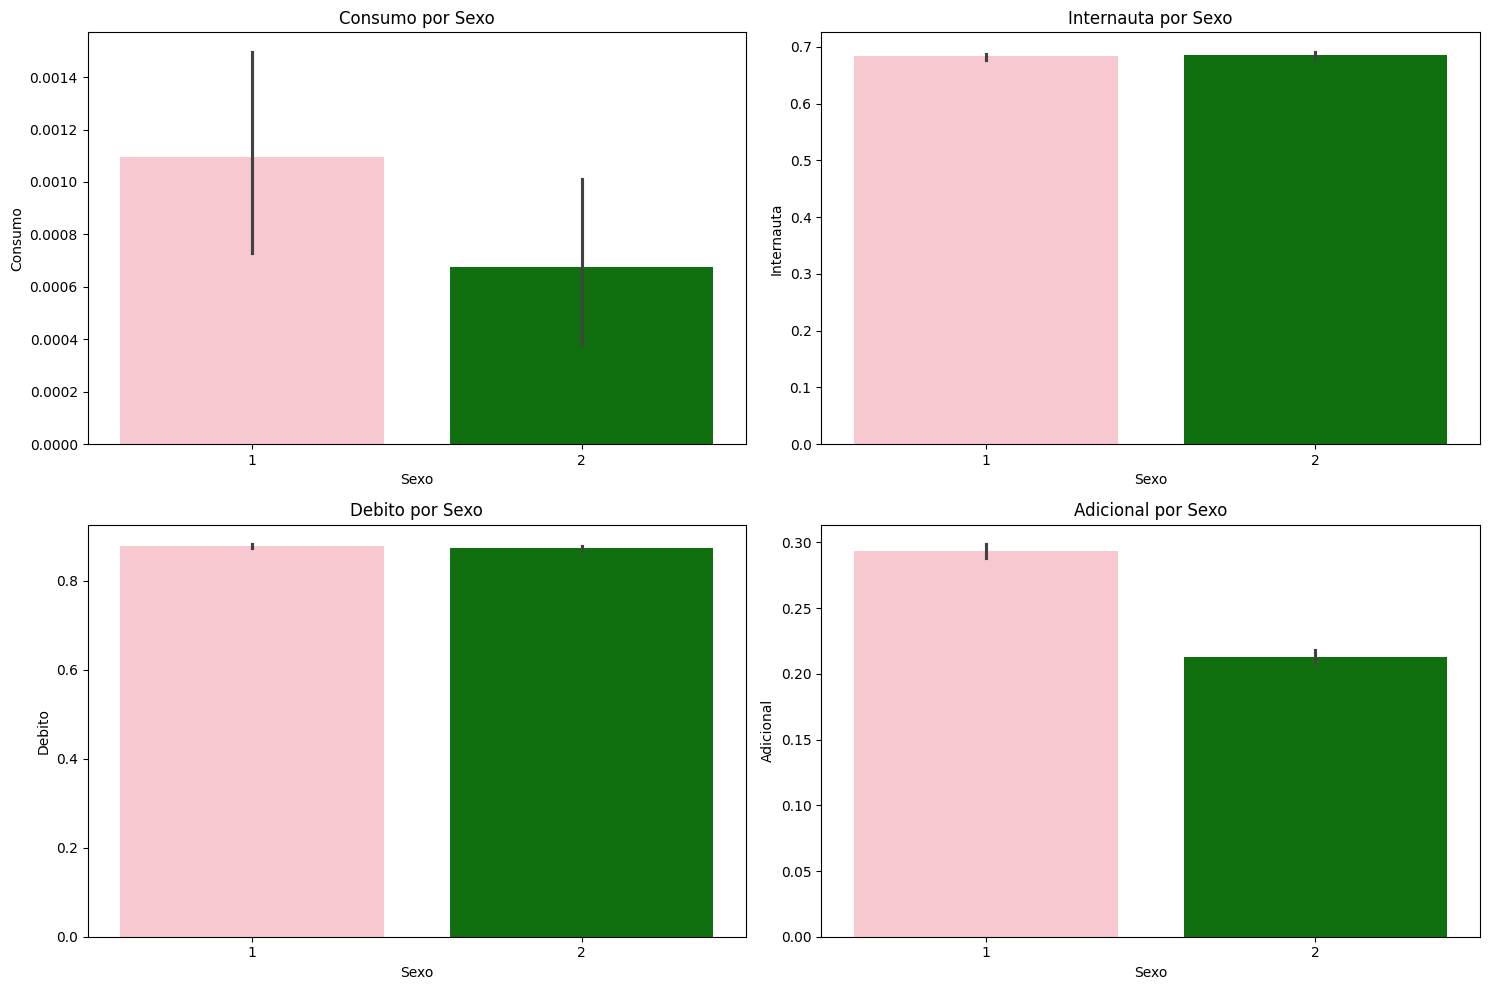

In [ ]:
# Crear un gráfico de barras para la relación entre Sexo y otras variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Colores para sexo tipo 1 (rosa) y sexo tipo 2 (verde)
palette = {'1': 'pink', '2': 'green'}

sb.barplot(x='Sexo', y='Consumo', data=df_imputed, ax=axes[0, 0], palette=palette)
sb.barplot(x='Sexo', y='Internauta', data=df_imputed, ax=axes[0, 1], palette=palette)
sb.barplot(x='Sexo', y='Debito', data=df_imputed, ax=axes[1, 0], palette=palette)
sb.barplot(x='Sexo', y='Adicional', data=df_imputed, ax=axes[1, 1], palette=palette)

axes[0, 0].set_title('Consumo por Sexo')
axes[0, 1].set_title('Internauta por Sexo')
axes[1, 0].set_title('Debito por Sexo')
axes[1, 1].set_title('Adicional por Sexo')

plt.tight_layout()
plt.show()

R.5.2: este grafico repesenta la relacion del sexo de los posibles usuarios y lo compara con otros datos, el grafico nos muestra que las mujeres son las pronsipales consumidoras de los productos de monopolio

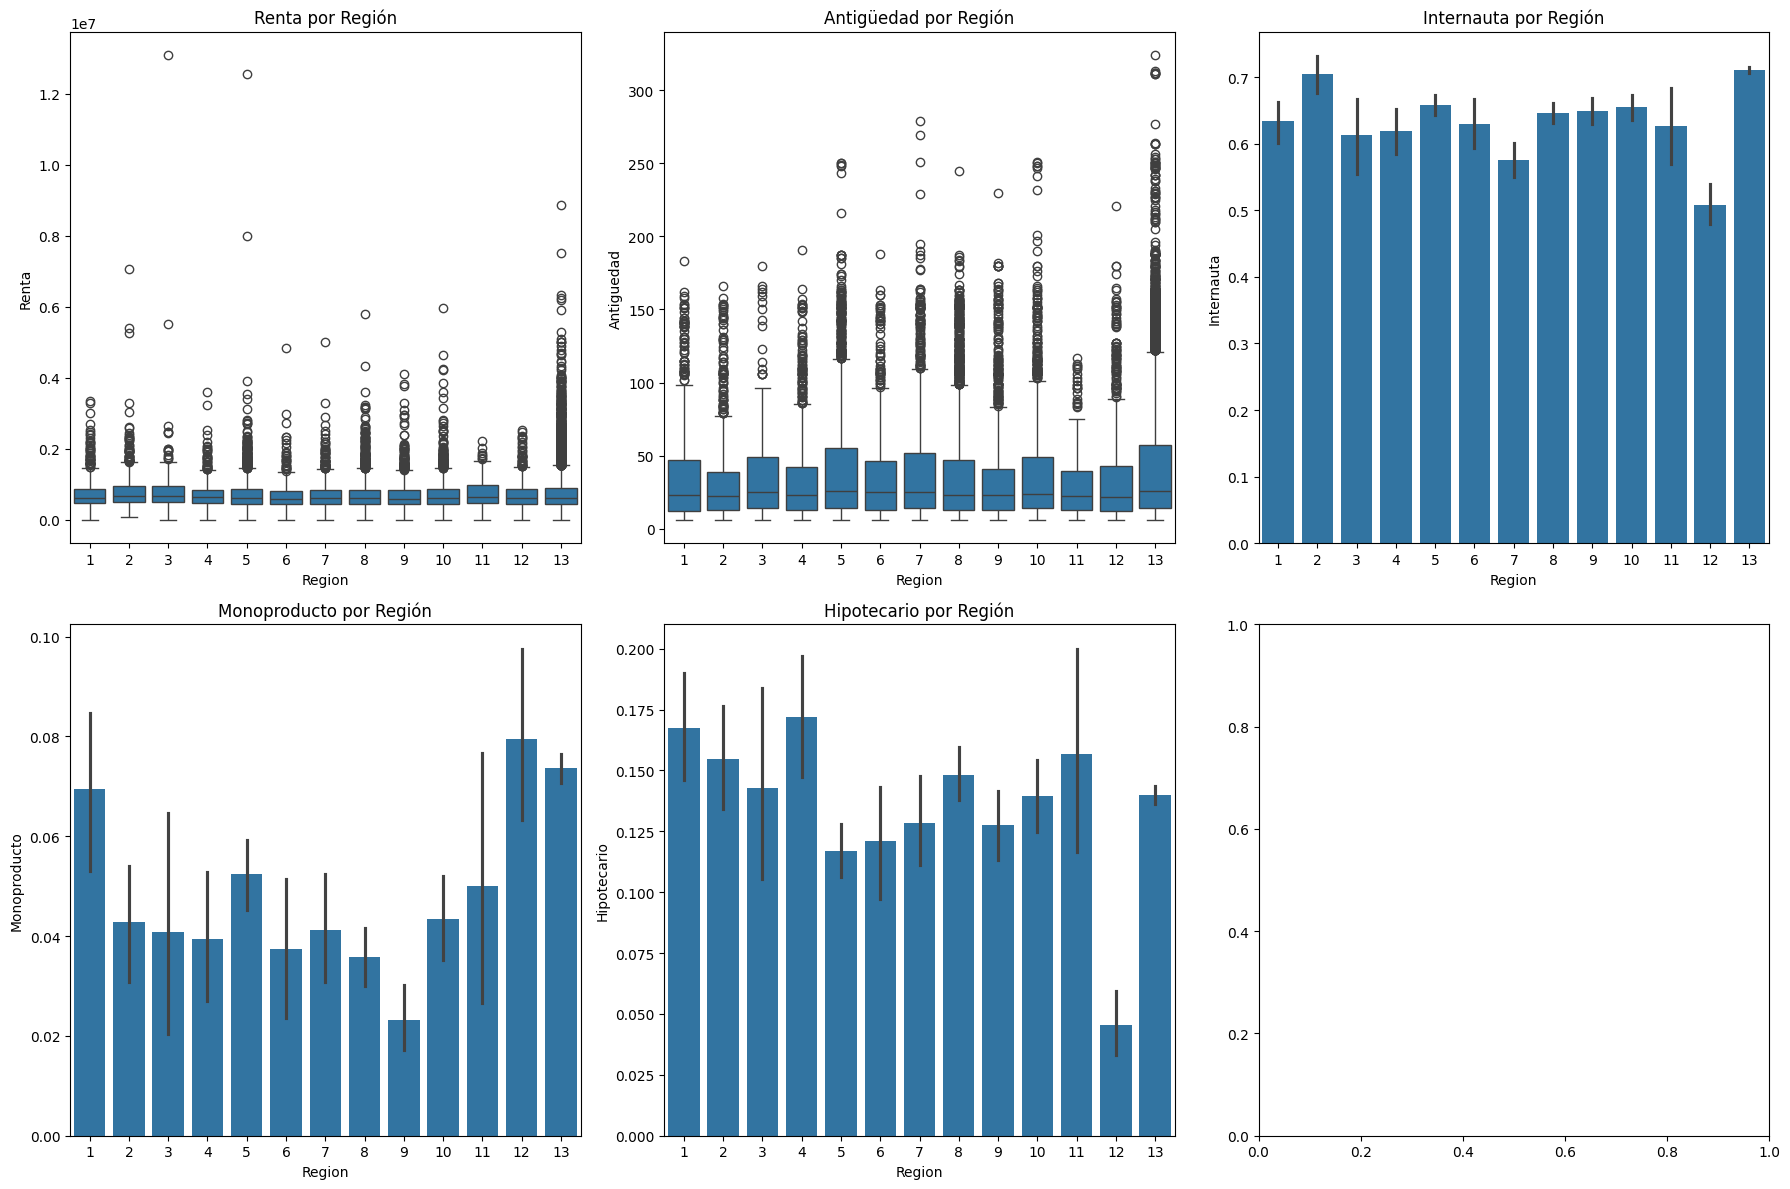

In [ ]:
# Crear un gráfico de cajas para la relación entre Región y otras variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sb.boxplot(x='Region', y='Renta', data=df_imputed, ax=axes[0, 0])
sb.boxplot(x='Region', y='Antiguedad', data=df_imputed, ax=axes[0, 1])
sb.barplot(x='Region', y='Internauta', data=df_imputed, ax=axes[0, 2])
sb.barplot(x='Region', y='Monoproducto', data=df_imputed, ax=axes[1, 0])
sb.barplot(x='Region', y='Hipotecario', data=df_imputed, ax=axes[1, 1])

axes[0, 0].set_title('Renta por Región')
axes[0, 1].set_title('Antigüedad por Región')
axes[0, 2].set_title('Internauta por Región')
axes[1, 0].set_title('Monoproducto por Región')
axes[1, 1].set_title('Hipotecario por Región')

plt.tight_layout()
plt.show()

R.5.3: en este caso, los graficos nos puestran la relacion entre las reguiones en comparacion a otras variables, uno de los datos mas interesantes de encontrar es que en todos los registros existen valores exepcionales que se salen de la normativa.

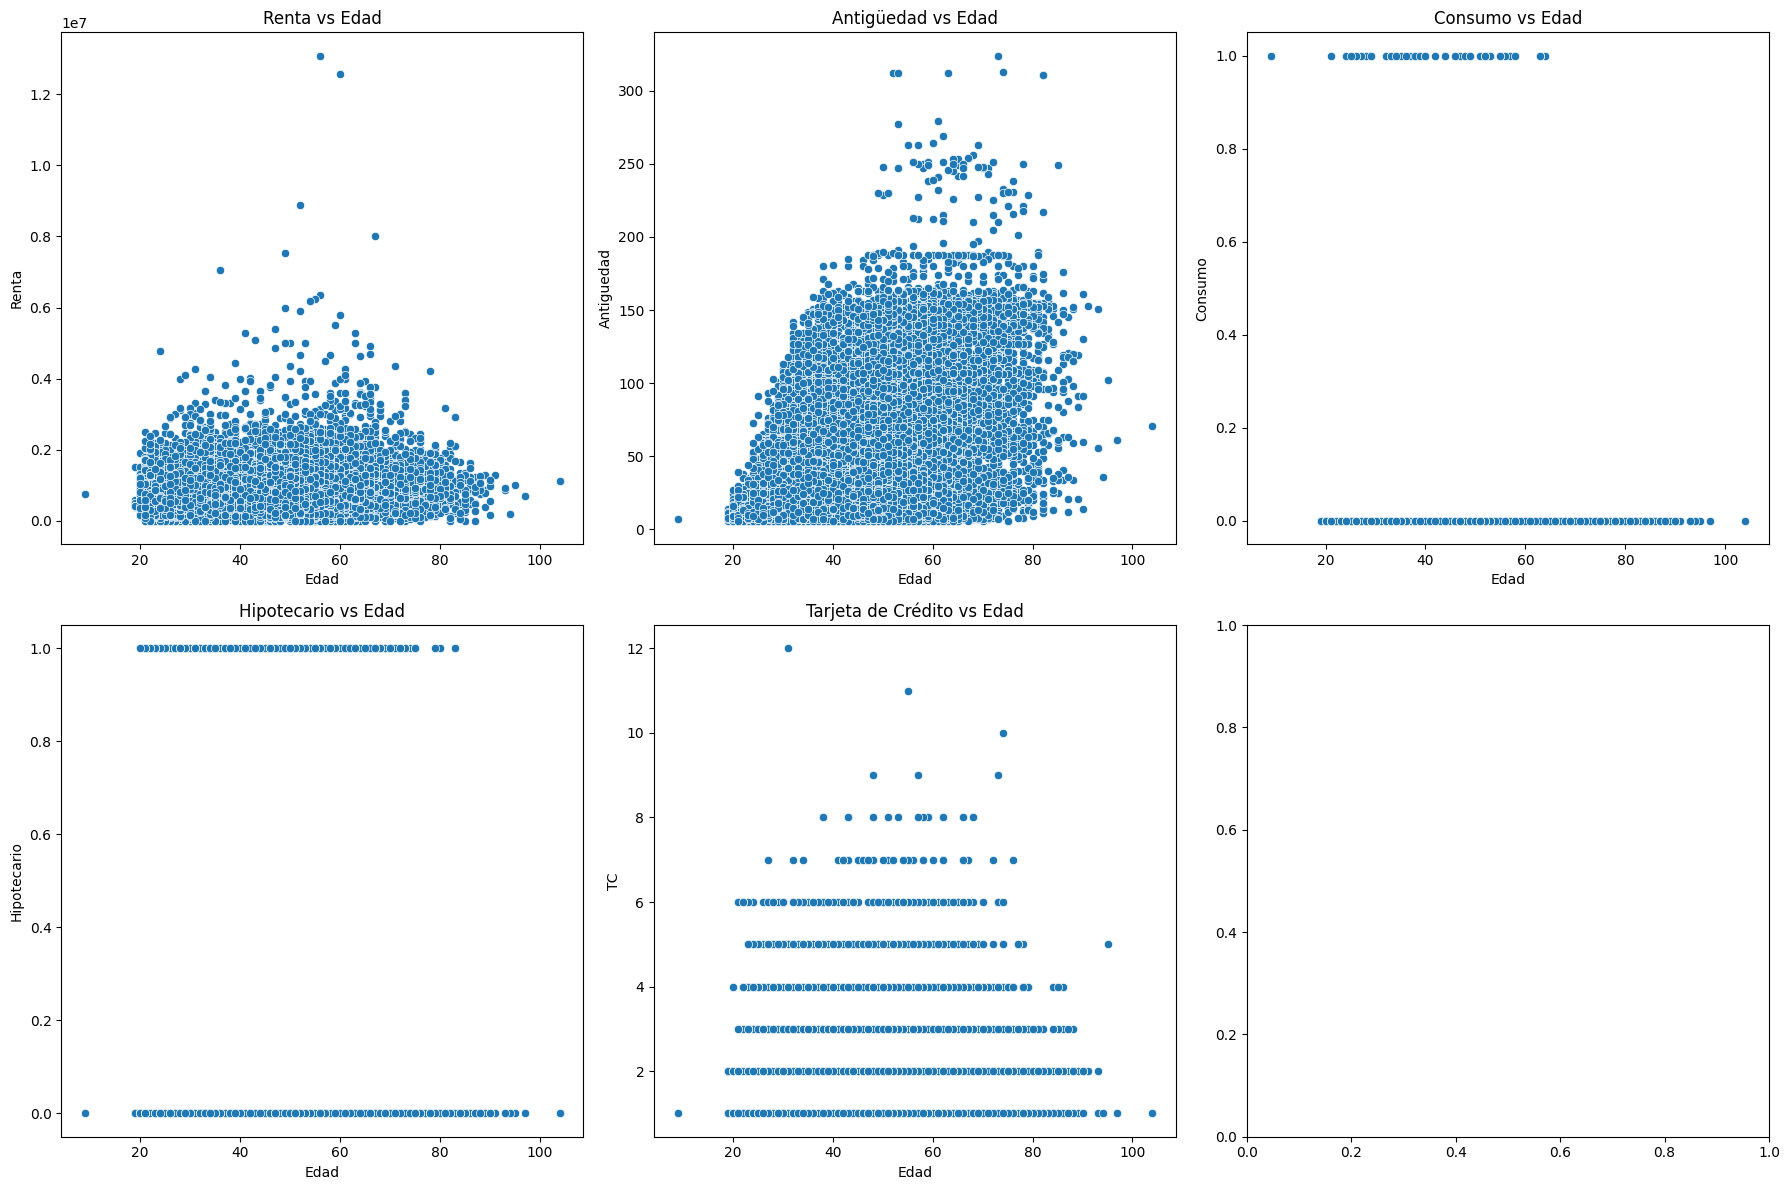

In [ ]:
# Crear gráficos de dispersión para analizar la relación entre Edad y otras variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sb.scatterplot(x='Edad', y='Renta', data=df_imputed, ax=axes[0, 0])
sb.scatterplot(x='Edad', y='Antiguedad', data=df_imputed, ax=axes[0, 1])
sb.scatterplot(x='Edad', y='Consumo', data=df_imputed, ax=axes[0, 2])
sb.scatterplot(x='Edad', y='Hipotecario', data=df_imputed, ax=axes[1, 0])
sb.scatterplot(x='Edad', y='TC', data=df_imputed, ax=axes[1, 1])

axes[0, 0].set_title('Renta vs Edad')
axes[0, 1].set_title('Antigüedad vs Edad')
axes[0, 2].set_title('Consumo vs Edad')
axes[1, 0].set_title('Hipotecario vs Edad')
axes[1, 1].set_title('Tarjeta de Crédito vs Edad')

plt.tight_layout()
plt.show()

R.5.4: en esta ocasion veremos un grafico de dispercion quye nos muestra la edad de los usuario en comparacion a otras variables, algunos de los datos mas interesantes en tanto en la renta como en la antiguedad de los consumidores de estros productos es vastante homogenea, con una ligera tendensia atener mas renta al rededos de la edad adulta.


<ipython-input-18-94d5d3c69a23>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axes[0, 0].pie(df_imputed['Consumo'].groupby(renta_cat).sum(), labels=renta_cat.unique(), autopct='%1.1f%%')
<ipython-input-18-94d5d3c69a23>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axes[0, 1].pie(df_imputed['Consumo'].groupby(edad_cat).sum(), labels=edad_cat.unique(), autopct='%1.1f%%')
<ipython-input-18-94d5d3c69a23>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

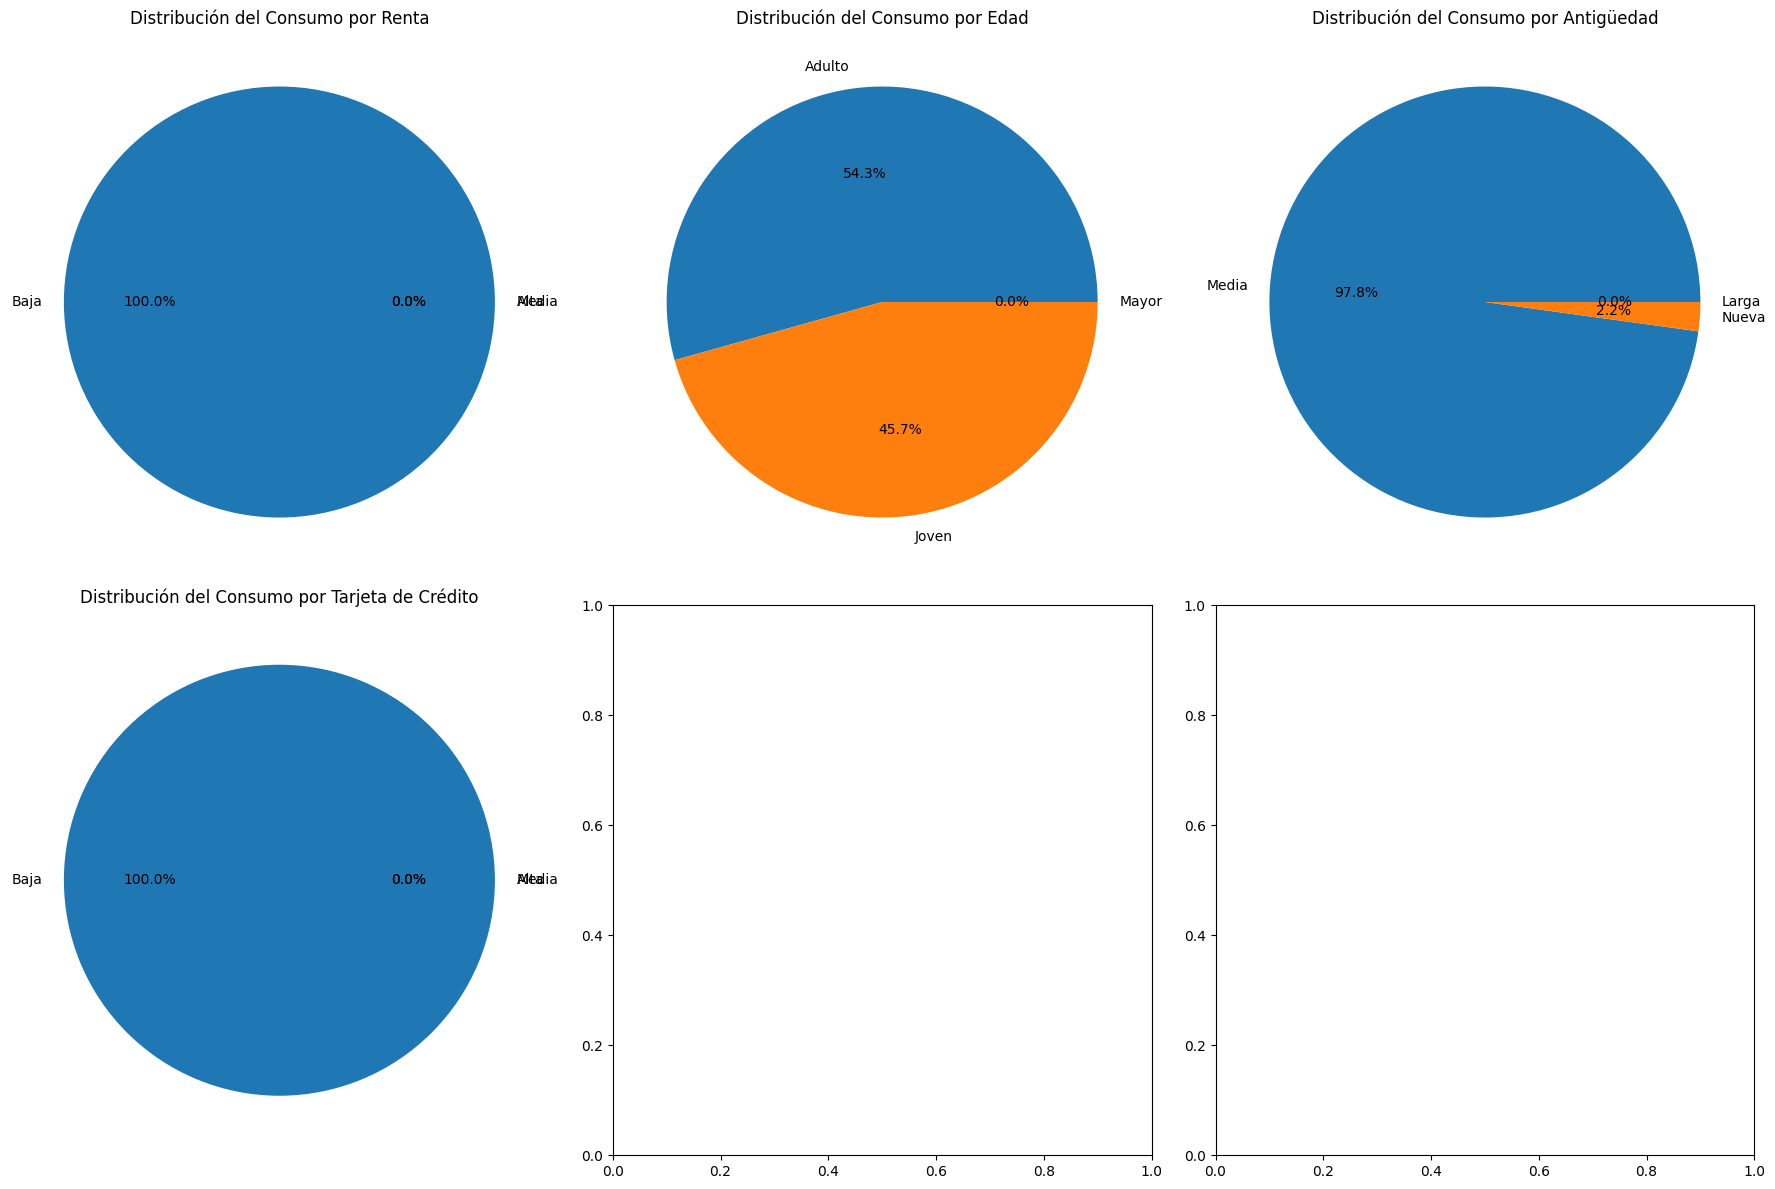

In [ ]:
# Crear gráficos de torta para analizar la relación entre Consumo y otras variables categorizadas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Crear una categorización para cada variable (esto es solo un ejemplo)
renta_cat = pd.cut(df_imputed['Renta'], bins=3, labels=['Baja', 'Media', 'Alta'])
edad_cat = pd.cut(df_imputed['Edad'], bins=3, labels=['Joven', 'Adulto', 'Mayor'])
antiguedad_cat = pd.cut(df_imputed['Antiguedad'], bins=3, labels=['Nueva', 'Media', 'Larga'])
tc_cat = pd.cut(df_imputed['TC'], bins=3, labels=['Baja', 'Media', 'Alta'])

# Crear gráficos de torta
axes[0, 0].pie(df_imputed['Consumo'].groupby(renta_cat).sum(), labels=renta_cat.unique(), autopct='%1.1f%%')
axes[0, 1].pie(df_imputed['Consumo'].groupby(edad_cat).sum(), labels=edad_cat.unique(), autopct='%1.1f%%')
axes[0, 2].pie(df_imputed['Consumo'].groupby(antiguedad_cat).sum(), labels=antiguedad_cat.unique(), autopct='%1.1f%%')
axes[1, 0].pie(df_imputed['Consumo'].groupby(tc_cat).sum(), labels=tc_cat.unique(), autopct='%1.1f%%')

# Títulos para cada gráfico
axes[0, 0].set_title('Distribución del Consumo por Renta')
axes[0, 1].set_title('Distribución del Consumo por Edad')
axes[0, 2].set_title('Distribución del Consumo por Antigüedad')
axes[1, 0].set_title('Distribución del Consumo por Tarjeta de Crédito')

plt.tight_layout()
plt.show()

R.5.5:aqui podemos un grafico de torta de que nos muestra el porsentage de consumo de algunos usuarios vasado en en otras variables, como lo es el caso de la edad, aparentemente las personas que mas consumen estos productos suelen ser las personas de una edad mas abansada y no suelen entrar nuevos clientes ya que la mayoria de las personas que compran, suelen tener una alta fidelisasion a la marca.

cambiar a grafico de torta  para ajor claridad

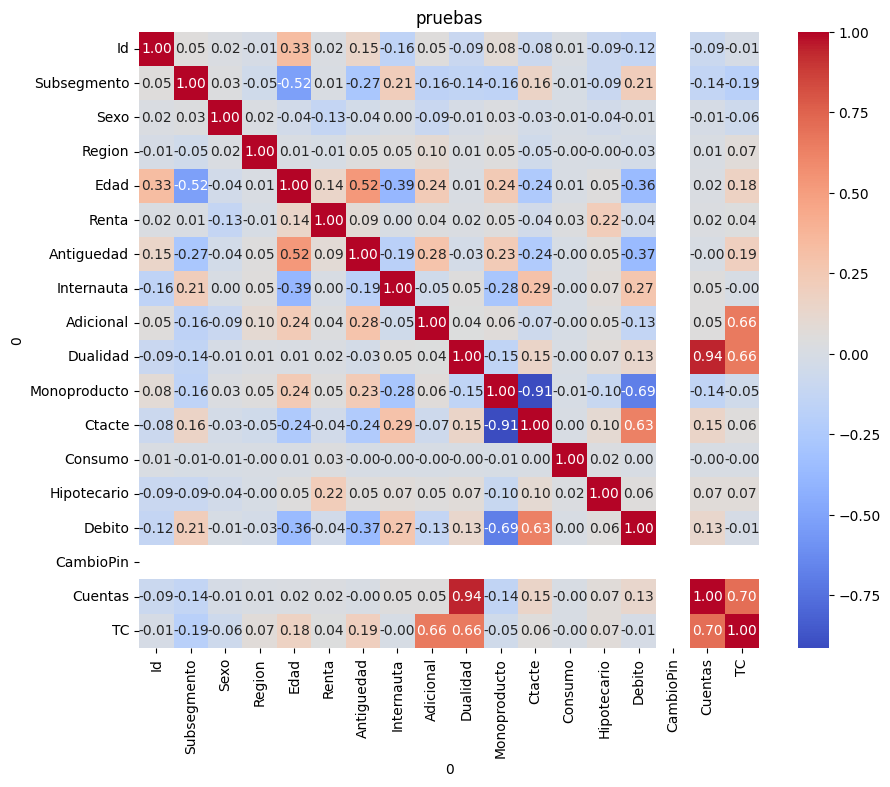

In [ ]:
# este codigo no esta listo //// acuerdate de adaptar el codigo con las columnas correctas
selected_columns = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC']
df_selected = df[selected_columns]
df_encoded = pd.get_dummies(df_selected)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('pruebas')
plt.show()